In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
os.path.join('C:\\Users\\mudit\\Downloads\\Toxic comment dataset\\kaggle dataset\\train\\dd2.csv')

'C:\\Users\\mudit\\Downloads\\Toxic comment dataset\\kaggle dataset\\train\\dd2.csv'

In [4]:
df = pd.read_csv(os.path.join('C:\\Users\\mudit\\Downloads\\Toxic comment dataset\\kaggle dataset\\train\\dd2.csv'))

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
!pip list


Package                       Version
----------------------------- --------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

In [6]:
from tensorflow.keras.layers import TextVectorization

In [7]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [8]:
MAX_FEATURES = 200000 

In [9]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [10]:
vectorizer.adapt(X.values)

In [11]:
vectorized_text = vectorizer(X.values)

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1900)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [13]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [15]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [16]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

In [19]:
history = model.fit(train, epochs=100, validation_data=val)

Epoch 1/100
81/81 [==============================] - 64s 725ms/step - loss: 0.2315 - val_loss: 0.1514
Epoch 2/100
81/81 [==============================] - 57s 708ms/step - loss: 0.1408 - val_loss: 0.1116
Epoch 3/100
81/81 [==============================] - 56s 689ms/step - loss: 0.0849 - val_loss: 0.0507
Epoch 4/100
81/81 [==============================] - 55s 685ms/step - loss: 0.0613 - val_loss: 0.0610
Epoch 5/100
81/81 [==============================] - 59s 731ms/step - loss: 0.0428 - val_loss: 0.0336
Epoch 6/100
81/81 [==============================] - 56s 690ms/step - loss: 0.0412 - val_loss: 0.0445
Epoch 7/100
81/81 [==============================] - 58s 720ms/step - loss: 0.0344 - val_loss: 0.0337
Epoch 8/100
81/81 [==============================] - 56s 689ms/step - loss: 0.0324 - val_loss: 0.0363
Epoch 9/100
81/81 [==============================] - 56s 686ms/step - loss: 0.0319 - val_loss: 0.0265
Epoch 10/100
81/81 [==============================] - 57s 701ms/step - loss: 0.028

In [20]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

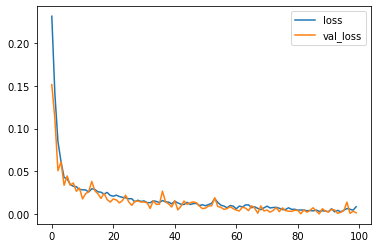

In [21]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [18]:
input_text = vectorizer(' I am going to hit you.')

In [19]:
model.predict(np.array([input_text]))

1/1 [==============================] - 2s 2s/step


array([[0.50258845, 0.5013038 , 0.4986984 , 0.4994485 , 0.4969478 ,
        0.5019605 ]], dtype=float32)

In [20]:
res = model.predict(np.array([input_text]))

1/1 [==============================] - 0s 141ms/step


In [21]:
(res > 0.5).astype(int)

array([[1, 1, 0, 0, 0, 1]])

In [22]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [23]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 233ms/step


array([[1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1]])

In [24]:
res.shape

(1, 6)

In [25]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [26]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [104]:
for batch in test.as_numpy_iterator(): 
    X_true, y_true = batch
    yhat = model.predict(X_true)
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 143ms/step


In [32]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 1.0, Recall:1.0, Accuracy:0.5454545617103577


In [33]:
model.save('toxic_comment_dropout4.h5')

In [28]:
model =tf.keras.models.load_model('toxic_comment_dropout4.h5')

In [105]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7053962349891663, Recall:0.9870748519897461, Accuracy:0.5967366099357605


In [106]:
F1 = 2 * ((pre.result().numpy() )*(re.result().numpy()) ) / ((pre.result().numpy() )+(re.result().numpy()) )

In [107]:
F1

0.822795615220621

In [108]:
input_str = vectorizer('i will kill you')

In [109]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 154ms/step


In [110]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [111]:
res

array([[0.2986586 , 0.00048853, 0.23165347, 0.00979489, 0.4188607 ,
        0.12290435]], dtype=float32)

In [112]:
!pip install gradio jinja2

In [113]:
import gradio as gr

In [114]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [115]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\mudit\anaconda3\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\mudit\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\mudit\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\mudit\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.9, however version 3.14.0 is available, please upgrade.
--------


In [116]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://7962c006f0d96de5.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x1f78f2fdf10>,
 'http://127.0.0.1:7860/',
 'https://7962c006f0d96de5.gradio.app')

1/1 [==============================] - 0s 76ms/step
